<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/31_Others_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# others CNN

### Your name :

#### 쉽지만 중요한 코너!

이미, '잘 만들어진'모델들을 가져다가 사용해보자.

[이 링크를 참고해보자](https://keras.io/applications/)


--------------------------
Rayleigh Kim @ D:plus

### 라이브러리 로딩

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.preprocessing import image


import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


* 참고 케라스 레퍼런스: https://keras.io/applications/
* 이미지 넷: http://image-net.org/

## 인셉션 모델 바로 가져오기!

[이 코드](https://github.com/fchollet/deep-learning-models/blob/master/inception_v3.py)를 참고하는 것도 도움이 된다!  <-- 깃허브의 소스코드


In [0]:
model = InceptionV3(weights = 'imagenet', # 이미지넷 데이터 바탕으로 미리 학습된 것
                              include_top=True, # 마지막 레이어(아웃풋 레이어<-이게 엄청 중요)까지 전부
                              input_shape= (299,299,3))

W0712 05:42:00.431112 139851003045760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 05:42:00.454612 139851003045760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 05:42:00.458062 139851003045760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 05:42:00.478713 139851003045760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 05:42:00.479492 1398510030

96116736/96112376 [==============================] - 3s 0us/step


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

엇, 마지막 prediction 레이어를 보면 노드가 1000개!

분류 가능한 이미지가 1000개라는 뜻!

[구경하러 가자](http://image-net.org/challenges/LSVRC/2014/browse-synsets)

### 내 그림 파일을 업로드 해둔 곳으로 가자!

In [0]:
from google.colab import drive

In [0]:
drive.mount('./now')

Drive already mounted at ./now; to attempt to forcibly remount, call drive.mount("./now", force_remount=True).


In [0]:
ls

my_first_save.h5  now/  sample_data/


In [0]:
cd now/My Drive

/content/now/My Drive


In [0]:
ls

 160924_13_03_kyungkang.xls           EE.xlsx
'제목 없는 스프레드시트 (1).gsheet'  '제목 없는 문서.gdoc'
'제목 없는 스프레드시트 (2).gsheet'  '다큐 영화 등.gsheet'
'제목 없는 스프레드시트 (3).gsheet'   구매.gsheet
'제목 없는 스프레드시트 (4).gsheet'  '제목 없는 스프레드시트.gsheet'
'제목 없는 스프레드시트 (5).gsheet'  '진화 알고리즘.gsheet'
'Artcl E.'/                           연비.gsheet
'Colab Notebooks'/                    Image_00001.bmp
 Deep_Vision/                         PER.gsheet
 EA.E.gsheet                         'Samjung parking system.gsheet'
'EA Everyday.gsheet'                  Untitled0.ipynb
'나만의 EE 연습.gsheet'              'Untitled spreadsheet.gsheet'
 EE.gsheet                            Videos/
'EE - persnl..gsheet'


In [0]:
cd Deep_Vision

/content/now/My Drive/Deep_Vision


In [0]:
ls

11_Colab_Basics.ipynb
12_Python_basics.ipynb
13_Numpy.ipynb
14_Pandas.ipynb
15번연습.ipynb
15_Quick_TF.ipynb
190711_모닝테스트.ipynb
21_Quick_Keras.ipynb
21연습_Quick_Keras.ipynb
22_ANN_with_Keras.ipynb
23_Keras_More_and_Deep_Learning.ipynb
23연습_Keras_More_and_Deep_Learning.ipynb
23_Keras_More_and_Deep_Learning___ORIGINAL.ipynb
24_My_First_CNN.ipynb
25_CNN_More.ipynb
31_Others_CNN.ipynb
32_Transfer_Learning.ipynb
33_AutoEncoder101.ipynb
Graduate_apply.csv.xlsx
memo01.txt
my_first_save.h5
my_mnist/
Stock_Edwards_Lifesciences_corporation.csv.xlsx
Untitled0.ipynb
Untitled1.ipynb


### 이미지를 불러와보자

In [0]:
import glob

In [0]:
files = glob.glob('Cats/*')

preprocess하기 전, 최대값: 255.0, 최소값: 0.0
preprocess후, 최대값: 1.0, 최소값: -1.0
[[('n02099712', 'Labrador_retriever', 0.84826005), ('n02099601', 'golden_retriever', 0.073783785), ('n02104029', 'kuvasz', 0.006416998), ('n02088364', 'beagle', 0.003226474), ('n02111500', 'Great_Pyrenees', 0.002332308)]]


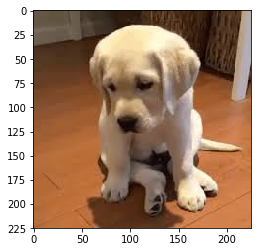

In [0]:
img = image.load_img(files[0], grayscale = False, target_size = (299,299) )
img = image.img_to_array(img)
img = img.reshape((-1,299,299,3))
print('preprocess하기 전, 최대값: {}, 최소값: {}'.format(np.max(img), np.min(img)))
img = preprocess_input(img)
print('preprocess후, 최대값: {}, 최소값: {}'.format(np.max(img), np.min(img)))

features = model.predict(img)
print(decode_predictions(features, top=5))

plt.imshow(image.load_img(files[0]))
plt.show()

### 이미지가 여러장 이라면

In [0]:
images = []
for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)
    

34/34 [==============================] - 3s 90ms/step
[('n02099712', 'Labrador_retriever', 0.848228), ('n02099601', 'golden_retriever', 0.07380106), ('n02104029', 'kuvasz', 0.006418512), ('n02088364', 'beagle', 0.0032269533), ('n02111500', 'Great_Pyrenees', 0.0023327626)]


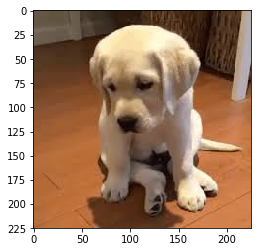

[('n02113624', 'toy_poodle', 0.86713827), ('n02113712', 'miniature_poodle', 0.07204281), ('n02113799', 'standard_poodle', 0.0010298418), ('n02087046', 'toy_terrier', 0.00069862645), ('n03492542', 'hard_disc', 0.00062144327)]


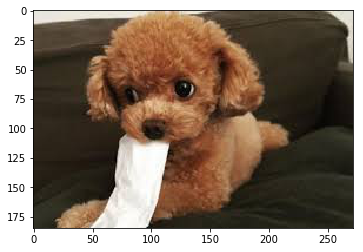

[('n02328150', 'Angora', 0.29526073), ('n02124075', 'Egyptian_cat', 0.17181122), ('n02971356', 'carton', 0.027646488), ('n04265275', 'space_heater', 0.016747817), ('n03793489', 'mouse', 0.01440303)]


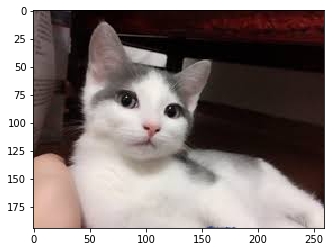

[('n02124075', 'Egyptian_cat', 0.9099733), ('n02123597', 'Siamese_cat', 0.03470171), ('n02123159', 'tiger_cat', 0.0075907437), ('n02123045', 'tabby', 0.0075552943), ('n02127052', 'lynx', 0.0053985002)]


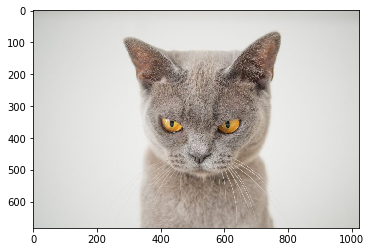

[('n02113624', 'toy_poodle', 0.58387905), ('n02113712', 'miniature_poodle', 0.23812677), ('n02102973', 'Irish_water_spaniel', 0.00321628), ('n02110627', 'affenpinscher', 0.0028645552), ('n02093859', 'Kerry_blue_terrier', 0.0021926882)]


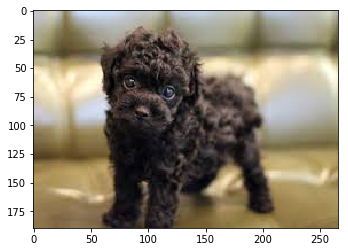

[('n02099712', 'Labrador_retriever', 0.6310622), ('n02099601', 'golden_retriever', 0.20992711), ('n02112137', 'chow', 0.034217358), ('n02111500', 'Great_Pyrenees', 0.030069882), ('n02104029', 'kuvasz', 0.009808365)]


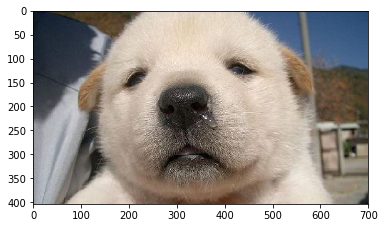

[('n02085620', 'Chihuahua', 0.9896039), ('n04258138', 'solar_dish', 0.002225559), ('n02107312', 'miniature_pinscher', 0.0019181756), ('n02087046', 'toy_terrier', 0.0017115616), ('n02113624', 'toy_poodle', 9.060681e-05)]


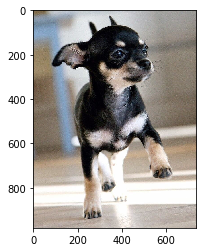

[('n02086910', 'papillon', 0.9055014), ('n02085620', 'Chihuahua', 0.0191424), ('n02087046', 'toy_terrier', 0.008041608), ('n02085782', 'Japanese_spaniel', 0.004873035), ('n04141975', 'scale', 0.0010309211)]


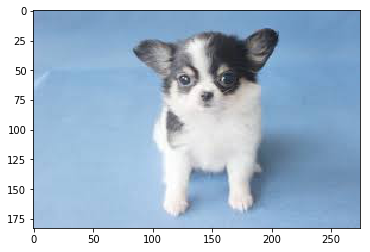

[('n02110185', 'Siberian_husky', 0.32317194), ('n02110063', 'malamute', 0.22519152), ('n02109961', 'Eskimo_dog', 0.21188253), ('n03218198', 'dogsled', 0.002239518), ('n04023962', 'punching_bag', 0.001934678)]


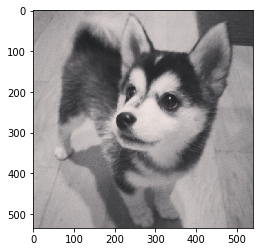

[('n02109961', 'Eskimo_dog', 0.48335782), ('n02110185', 'Siberian_husky', 0.38131362), ('n03218198', 'dogsled', 0.0021863235), ('n02091467', 'Norwegian_elkhound', 0.0006492632), ('n04372370', 'switch', 0.0006248728)]


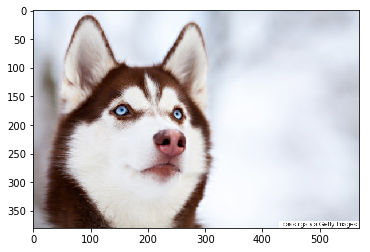

[('n02085936', 'Maltese_dog', 0.4414318), ('n02086079', 'Pekinese', 0.25958753), ('n02113624', 'toy_poodle', 0.04185892), ('n02112018', 'Pomeranian', 0.029495796), ('n02085782', 'Japanese_spaniel', 0.020005085)]


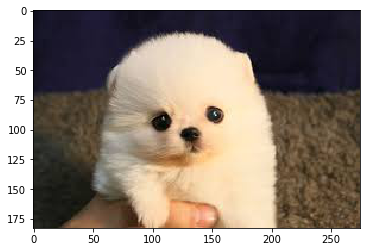

[('n02115641', 'dingo', 0.90135807), ('n02110806', 'basenji', 0.008827344), ('n02109961', 'Eskimo_dog', 0.003781321), ('n02115913', 'dhole', 0.0034941828), ('n02110185', 'Siberian_husky', 0.0019239967)]


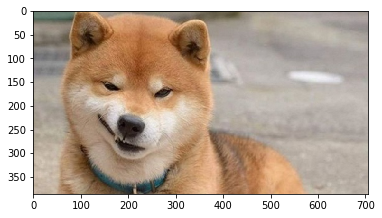

[('n02099601', 'golden_retriever', 0.96018785), ('n02100877', 'Irish_setter', 0.0019966327), ('n04409515', 'tennis_ball', 0.0014683448), ('n02099712', 'Labrador_retriever', 0.0013993016), ('n02099267', 'flat-coated_retriever', 0.0011925314)]


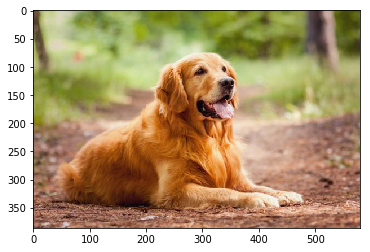

[('n02112018', 'Pomeranian', 0.47569957), ('n02112137', 'chow', 0.18106422), ('n02086079', 'Pekinese', 0.09641454), ('n04399382', 'teddy', 0.0077559347), ('n02099601', 'golden_retriever', 0.0055144522)]


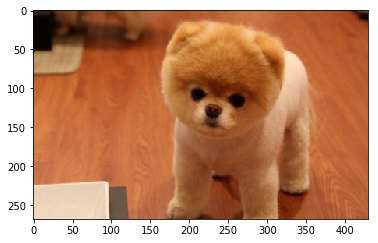

[('n02123394', 'Persian_cat', 0.91406673), ('n02127052', 'lynx', 0.0017343604), ('n02123045', 'tabby', 0.0014908343), ('n02328150', 'Angora', 0.0013316007), ('n02123597', 'Siamese_cat', 0.0011490117)]


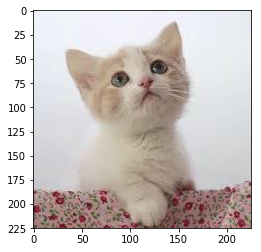

[('n02123045', 'tabby', 0.5959935), ('n02124075', 'Egyptian_cat', 0.12519), ('n02123159', 'tiger_cat', 0.074647225), ('n02808440', 'bathtub', 0.014191685), ('n02123394', 'Persian_cat', 0.009092133)]


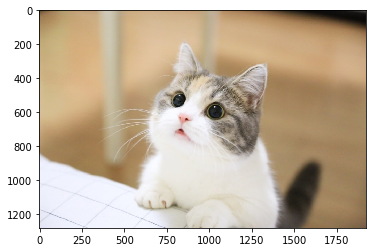

[('n02124075', 'Egyptian_cat', 0.6909496), ('n02123597', 'Siamese_cat', 0.13847329), ('n02123045', 'tabby', 0.047259185), ('n02127052', 'lynx', 0.018617772), ('n02123159', 'tiger_cat', 0.0073053814)]


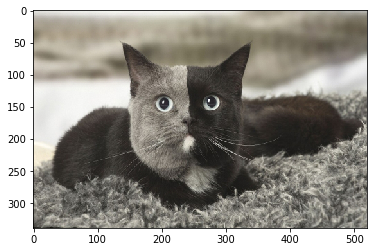

[('n04493381', 'tub', 0.13356848), ('n02124075', 'Egyptian_cat', 0.121892646), ('n02123159', 'tiger_cat', 0.10784547), ('n02808440', 'bathtub', 0.10599594), ('n02123045', 'tabby', 0.0818913)]


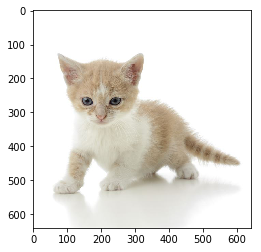

[('n02085936', 'Maltese_dog', 0.86047286), ('n02098413', 'Lhasa', 0.030807411), ('n02094433', 'Yorkshire_terrier', 0.0069207237), ('n02086240', 'Shih-Tzu', 0.004296294), ('n02113624', 'toy_poodle', 0.0039921836)]


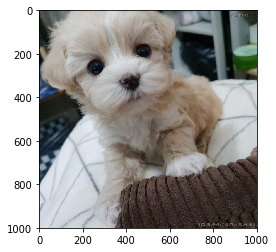

[('n02113624', 'toy_poodle', 0.39252335), ('n02113712', 'miniature_poodle', 0.34354797), ('n02097474', 'Tibetan_terrier', 0.08091553), ('n02086646', 'Blenheim_spaniel', 0.009995326), ('n02094433', 'Yorkshire_terrier', 0.009972076)]


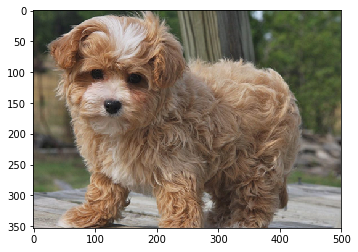

[('n02088364', 'beagle', 0.7711681), ('n02089867', 'Walker_hound', 0.07657851), ('n02089973', 'English_foxhound', 0.070043266), ('n02088632', 'bluetick', 0.009190192), ('n02088466', 'bloodhound', 0.005561668)]


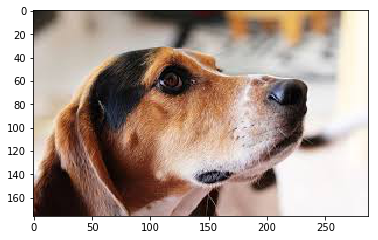

[('n02113023', 'Pembroke', 0.83254266), ('n02113186', 'Cardigan', 0.046412785), ('n04409515', 'tennis_ball', 0.008377798), ('n04584207', 'wig', 0.0027354741), ('n03935335', 'piggy_bank', 0.0011947392)]


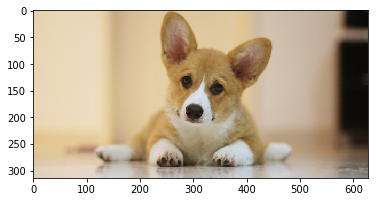

[('n02091134', 'whippet', 0.27215976), ('n02091244', 'Ibizan_hound', 0.22332181), ('n02109047', 'Great_Dane', 0.088797696), ('n02110806', 'basenji', 0.01261394), ('n02093256', 'Staffordshire_bullterrier', 0.011623576)]


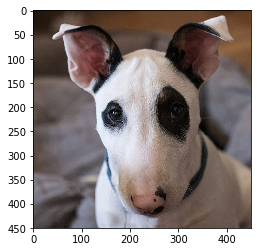

[('n02109961', 'Eskimo_dog', 0.36124825), ('n02114548', 'white_wolf', 0.30640355), ('n02110185', 'Siberian_husky', 0.060535472), ('n02104029', 'kuvasz', 0.031984348), ('n02115641', 'dingo', 0.02389711)]


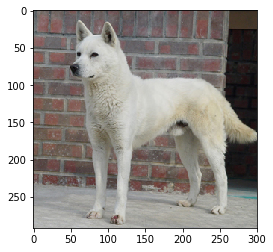

[('n02123045', 'tabby', 0.9007878), ('n02123159', 'tiger_cat', 0.07310684), ('n02124075', 'Egyptian_cat', 0.0053643007), ('n02123394', 'Persian_cat', 0.00083045615), ('n04423845', 'thimble', 0.0002680951)]


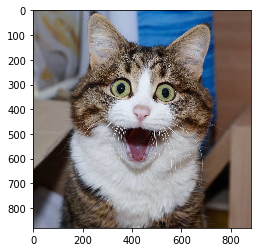

[('n04553703', 'washbasin', 0.7776794), ('n04447861', 'toilet_seat', 0.15650897), ('n04209239', 'shower_curtain', 0.013569636), ('n04493381', 'tub', 0.007630909), ('n02808440', 'bathtub', 0.006636794)]


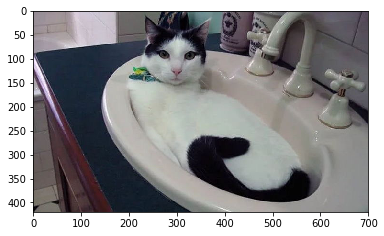

[('n04553703', 'washbasin', 0.94456756), ('n02808440', 'bathtub', 0.03574943), ('n04493381', 'tub', 0.007495314), ('n04254120', 'soap_dispenser', 0.0019123396), ('n04447861', 'toilet_seat', 0.0006667714)]


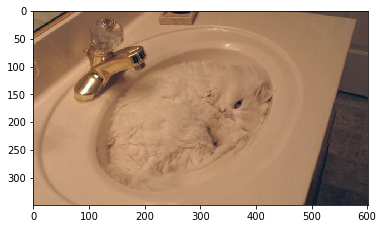

[('n04553703', 'washbasin', 0.19064763), ('n04447861', 'toilet_seat', 0.14601216), ('n02123394', 'Persian_cat', 0.0904023), ('n02123045', 'tabby', 0.047242228), ('n03633091', 'ladle', 0.041811164)]


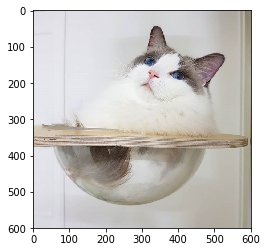

[('n02124075', 'Egyptian_cat', 0.11962334), ('n02123159', 'tiger_cat', 0.09158419), ('n02123045', 'tabby', 0.03596575), ('n03887697', 'paper_towel', 0.029605832), ('n02091244', 'Ibizan_hound', 0.021664264)]


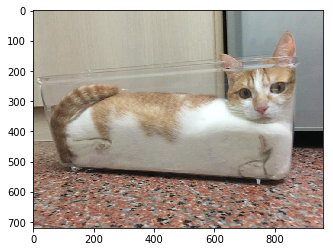

[('n02123045', 'tabby', 0.24958521), ('n02091134', 'whippet', 0.18801224), ('n02123159', 'tiger_cat', 0.17500444), ('n02124075', 'Egyptian_cat', 0.02681264), ('n02092002', 'Scottish_deerhound', 0.025091728)]


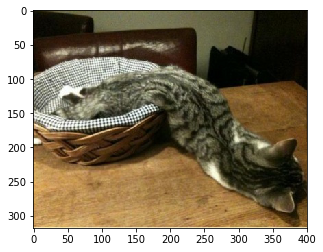

[('n02123394', 'Persian_cat', 0.43398342), ('n02123045', 'tabby', 0.06460481), ('n02328150', 'Angora', 0.029915554), ('n04367480', 'swab', 0.01988844), ('n02971356', 'carton', 0.01705158)]


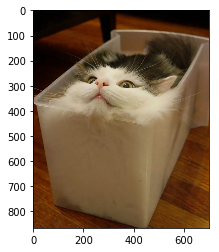

[('n02909870', 'bucket', 0.93843), ('n04522168', 'vase', 0.015070391), ('n02124075', 'Egyptian_cat', 0.012561407), ('n02123045', 'tabby', 0.0060920515), ('n15075141', 'toilet_tissue', 0.0027774454)]


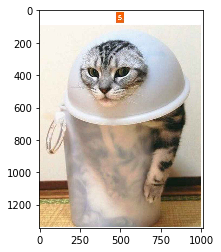

[('n02123394', 'Persian_cat', 0.26692906), ('n02098286', 'West_Highland_white_terrier', 0.18679383), ('n02111889', 'Samoyed', 0.096171804), ('n02085936', 'Maltese_dog', 0.046366695), ('n02104029', 'kuvasz', 0.038503326)]


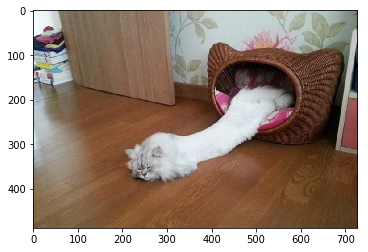

[('n02123597', 'Siamese_cat', 0.36237723), ('n03958227', 'plastic_bag', 0.03413396), ('n03532672', 'hook', 0.024813145), ('n02364673', 'guinea_pig', 0.01677813), ('n03887697', 'paper_towel', 0.01540676)]


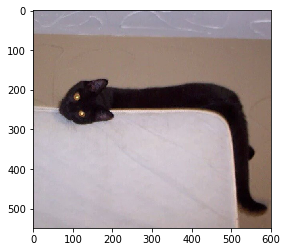

In [0]:
features = model.predict(images, verbose=1)
predictions = decode_predictions(features)
for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

## Exercise!

* 고양이로 한다. (싫으면 다른거 하나 정하자.)
* 잘되는 고양이 10 개 찾아보자.
* 안되는 고양이 10 개 찾아보자.

* 남이 만든 모델의 문제:
 * 클래스가 없으면 어떻게 할 것인가?
 
 
* 남이 만든 모델에 내가 수집한 데이터 넣을 수 있을까?
 
* 남이 만든 모델을 내 입맛에 맞게 고쳐 쓸  수 있을까?
 * -> Transfer Learning
 
 
 인풋레이어 224 x 224 x 3 = 150528
 콘볼루션... 레이어 있고
 마지막에  아웃풋 레이어의 직전 Layer가 만약 4096 유닛
 4096유닛에는 고도화된 학습데이터 정보가 들어있기 때문에 단순 로지스틱 레그레션이 잘 됨
 
 -> 마지막 4096 까지는 건들지 말고
 그 이후만 수정하면 나만의 판독기가 됨( 걸그룹 사진 등 )
 혹은 콘볼루션 레이어의 중반 이후부터는 해당 모델의 특징을 위한 레이어들이 들어있다. 이부분 이후부터 들어내거나 수정하면 됨
 초반에는 공통적인 부분을 학습하나, 그 이후 중후반부터는 모델의 특성이 많이 들어가기 때문이다.
 